<a href="https://colab.research.google.com/github/MKhromina/-furry-train/blob/master/%D0%A5%D1%80%D0%BE%D0%BC%D0%B8%D0%BD%D0%B0%D0%9C_%D0%90_%D1%86%D0%B8%D1%84%D1%80%D0%BE%D0%B2%D0%BE%D0%B5_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#импорт необходимых библиотек
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=files.upload() #загрузка данных

Saving data.csv to data (1).csv


In [3]:
all_data = pd.read_csv('data.csv',)#считываем данные через pandas
all_data#педпросмотр данных (заметно, что в данных есть сортировка по классам (ведние относятся к классу 1, нижние к классу 3) это может негатиыно сказаться на обучении модели)

,temperature,velocity,pressure,incline,class
0,5.1,3.5,1.4,0.2,Class_1
1,4.9,3.0,1.4,0.2,Class_1
2,4.7,3.2,1.3,0.2,Class_1
3,4.6,3.1,1.5,0.2,Class_1
4,5.0,3.6,1.4,0.2,Class_1
...,...,...,...,...,...
129,6.7,3.0,5.2,2.3,Class_3
130,6.3,2.5,5.0,1.9,Class_3
131,6.5,3.0,5.2,2.0,Class_3
132,6.2,3.4,5.4,2.3,Class_3


In [0]:
newdata=all_data.sample(frac=1) #перемешиваем данные
x = newdata.iloc[:,0:-1] #выбор признаков
y = newdata.iloc[:,[-1]]#выбор значений
#предобработка значений в вид, допустимый для обучения
y1=(y['class']  == 'Class_1')
y2=(y['class']  == 'Class_2')
y3=(y['class']  == 'Class_3')
y_train1=pd.DataFrame({'class1':y1, 'class2':y2, 'class3':y3})
y_train1.astype(int)
#предобработка признаков в вид, пригодный для обучения
x1=x.temperature.mean()
x2=x.velocity.mean()
x3=x.pressure.mean()
x4=x.incline.mean()
xs1=x.temperature.std()
xs2=x.velocity.std()
xs3=x.pressure.std()
xs4=x.incline.std()
x.temperature-=x1
x.temperature/=xs1
x.velocity-=x2
x.velocity/xs2
x.pressure-=x3
x.pressure/=xs3
x.incline-=x4
x.incline/=xs4
#выбор тестовых и тренировочных данных
x_train=x.iloc[0:103,0:]
x_test=x.iloc[103:134,0:]
y_train=(y_train1.iloc[0:103]).astype(int)
y_test=(y_train1.iloc[103:134]).astype(int)
y_test2=tf.stack(y_test)
y_train2=tf.stack(y_train)
x_train2=tf.stack(x_train)
x_test2=tf.stack(x_test)

In [55]:
model = Sequential()
model.add(Dense(224, activation='elu', input_shape=(x_train2.shape[1],)))
model.add(Dense(416, activation='elu', input_shape=(x_train2.shape[1],)))
model.add(Dense(3, activation="softmax"))
#необходимо обратить внимание на то, что не применяется нелинейная функция активации
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 224)               1120      
_________________________________________________________________
dense_10 (Dense)             (None, 416)               93600     
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 1251      
Total params: 95,971
Trainable params: 95,971
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
history = model.fit(x_train2, y_train2,
                     epochs=7,
                     validation_split=0.2,
                     shuffle=True,
                     verbose=2)

Epoch 1/7
3/3 - 0s - loss: 0.8346 - accuracy: 0.5732 - val_loss: 0.5541 - val_accuracy: 0.8571
Epoch 2/7
3/3 - 0s - loss: 0.4759 - accuracy: 0.7805 - val_loss: 0.4143 - val_accuracy: 0.9524
Epoch 3/7
3/3 - 0s - loss: 0.3641 - accuracy: 0.8171 - val_loss: 0.3438 - val_accuracy: 0.9524
Epoch 4/7
3/3 - 0s - loss: 0.3333 - accuracy: 0.8780 - val_loss: 0.3036 - val_accuracy: 0.9524
Epoch 5/7
3/3 - 0s - loss: 0.2749 - accuracy: 0.8902 - val_loss: 0.2792 - val_accuracy: 0.9524
Epoch 6/7
3/3 - 0s - loss: 0.2414 - accuracy: 0.9024 - val_loss: 0.2541 - val_accuracy: 0.9524
Epoch 7/7
3/3 - 0s - loss: 0.2313 - accuracy: 0.9024 - val_loss: 0.2375 - val_accuracy: 0.9524


1/1 [==============================] - 0s 5ms/step - loss: 0.2254 - accuracy: 0.9677
Точность работы на тестовых данных: 96.77%


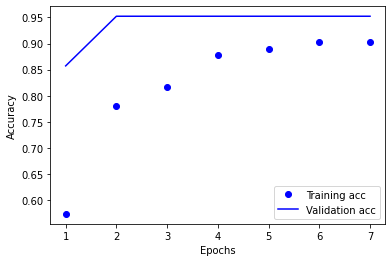

In [57]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(x_test2, y_test2, verbose=1)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()